## Data Set: Busses!

Notebook by Lucy Pry

In this notebook, I will be determining what neighborhood in Pittsburgh is the best for bus transportation based on how frequently it is used, if it's a current stop, and whether or not it has shelter! I used this data set:
https://data.wprdc.org/dataset/port-authority-transit-stop-usage/resource/3115c0b9-b48a-49aa-8e39-fd318eb62c04

First off, let's look at our data and clear out the unneeded columns so we can see what we're working with.

In [9]:
import pandas as pd

data = pd.read_csv('bus.csv')
dropped = data.drop(columns=['STOP_ID','ROUTE','STOP_ROUTE','CLEVER_ID','ALL_ROUTES','STOP_TYPE','1806_ON','1806_OFF','1809_ON','1809_OFF','1811_ON','1811_OFF','1903_ON','1903_OFF','1906_ON','1906_OFF'])
dropped.head(10)

,STOP_NAME,LATITUDE,LONGITUDE,SHELTER,CURRENT_STOP,FY19_AVG_ON,FY19_AVG_OFF,FY19_AVG_TOTAL,FY19_RANK
0,SMITHFIELD ST AT SIXTH AVE,40.441550,-79.997761,Envision Downtown,Yes,3408,1737,5145,1
1,LIBERTY AVE AT 10TH ST,40.443739,-79.995153,Envision Downtown,Yes,877,2257,3134,2
2,STANWIX ST AT FORBES AVE,40.440989,-80.003966,No Shelter,Yes,1245,828,2073,3
3,7TH ST AT PENN AVE,40.443298,-80.000402,No Shelter,Yes,732,1140,1872,4
4,LIBERTY AVE AT WOOD ST,40.442401,-79.999575,No Shelter,Yes,1310,431,1741,5
5,EAST BUSWAY AT EAST LIBERTY,40.459374,-79.923171,PAAC,Yes,788,649,1437,6
6,LAYOVER-EAST BUSWAY SWISSVAL,40.415074,-79.879265,No Shelter,Yes,729,685,1414,7
7,EAST BUSWAY AT WILKINSBURG S,40.446128,-79.888401,PAAC,Yes,115,1202,1317,8
8,WOOD ST AT SIXTH AVE,40.441825,-79.999527,No Shelter,Yes,561,752,1313,9
9,LIBERTY AVE AT WOOD ST,40.442401,-79.999575,No Shelter,Yes,901,397,1298,10


Cool!
First, let's get rid of any of the bus stops that aren't stops. Those won't help anyone.

In [10]:
busNA = dropped.dropna()

query_mask = busNA['CURRENT_STOP'].str.contains("Yes")
busBus = busNA[query_mask]
busBus.head(10)

,STOP_NAME,LATITUDE,LONGITUDE,SHELTER,CURRENT_STOP,FY19_AVG_ON,FY19_AVG_OFF,FY19_AVG_TOTAL,FY19_RANK
0,SMITHFIELD ST AT SIXTH AVE,40.441550,-79.997761,Envision Downtown,Yes,3408,1737,5145,1
1,LIBERTY AVE AT 10TH ST,40.443739,-79.995153,Envision Downtown,Yes,877,2257,3134,2
2,STANWIX ST AT FORBES AVE,40.440989,-80.003966,No Shelter,Yes,1245,828,2073,3
3,7TH ST AT PENN AVE,40.443298,-80.000402,No Shelter,Yes,732,1140,1872,4
4,LIBERTY AVE AT WOOD ST,40.442401,-79.999575,No Shelter,Yes,1310,431,1741,5
5,EAST BUSWAY AT EAST LIBERTY,40.459374,-79.923171,PAAC,Yes,788,649,1437,6
6,LAYOVER-EAST BUSWAY SWISSVAL,40.415074,-79.879265,No Shelter,Yes,729,685,1414,7
7,EAST BUSWAY AT WILKINSBURG S,40.446128,-79.888401,PAAC,Yes,115,1202,1317,8
8,WOOD ST AT SIXTH AVE,40.441825,-79.999527,No Shelter,Yes,561,752,1313,9
9,LIBERTY AVE AT WOOD ST,40.442401,-79.999575,No Shelter,Yes,901,397,1298,10


Fantastic! Next we're going to look where has shelter because no one wants to wait around standing in the cold for the bus.

In [11]:
shelterFilter = busBus.drop(busBus.loc[busBus['SHELTER']=='No Shelter'].index)
shelterFilter.head(100)

,STOP_NAME,LATITUDE,LONGITUDE,SHELTER,CURRENT_STOP,FY19_AVG_ON,FY19_AVG_OFF,FY19_AVG_TOTAL,FY19_RANK
0,SMITHFIELD ST AT SIXTH AVE,40.441550,-79.997761,Envision Downtown,Yes,3408,1737,5145,1
1,LIBERTY AVE AT 10TH ST,40.443739,-79.995153,Envision Downtown,Yes,877,2257,3134,2
5,EAST BUSWAY AT EAST LIBERTY,40.459374,-79.923171,PAAC,Yes,788,649,1437,6
7,EAST BUSWAY AT WILKINSBURG S,40.446128,-79.888401,PAAC,Yes,115,1202,1317,8
11,EAST BUSWAY AT WILKINSBURG S,40.446426,-79.888392,PAAC,Yes,1036,189,1225,12
...,...,...,...,...,...,...,...,...,...
209,SIXTH AVE AT SMITHFIELD ST,40.441514,-79.998137,City of Pittsburgh,Yes,162,96,258,210
211,SMITHFIELD ST AT SIXTH AVE,40.441550,-79.997761,Envision Downtown,Yes,169,87,256,212
215,LIBERTY AVE AT MARKET ST,40.441713,-80.002122,Other,Yes,0,255,255,216
217,WATERWORKS MALL AT GIANT EAG,40.487685,-79.893940,PAAC,Yes,199,53,252,218


Alright! We're down from 11,901 bus stops to 93. Let's try to get it a little lower though. If the amount on or off is less than 100, we'll drop it.

In [12]:
avgOn = shelterFilter.query('FY19_AVG_ON >= 100')
bestOfTheBest = avgOn.query('FY19_AVG_OFF >= 100')
bestOfTheBest.head(100)

,STOP_NAME,LATITUDE,LONGITUDE,SHELTER,CURRENT_STOP,FY19_AVG_ON,FY19_AVG_OFF,FY19_AVG_TOTAL,FY19_RANK
0,SMITHFIELD ST AT SIXTH AVE,40.441550,-79.997761,Envision Downtown,Yes,3408,1737,5145,1
1,LIBERTY AVE AT 10TH ST,40.443739,-79.995153,Envision Downtown,Yes,877,2257,3134,2
5,EAST BUSWAY AT EAST LIBERTY,40.459374,-79.923171,PAAC,Yes,788,649,1437,6
7,EAST BUSWAY AT WILKINSBURG S,40.446128,-79.888401,PAAC,Yes,115,1202,1317,8
11,EAST BUSWAY AT WILKINSBURG S,40.446426,-79.888392,PAAC,Yes,1036,189,1225,12
13,BLVD OF ALLIES AT POST GAZET,40.439846,-80.006099,City of Pittsburgh,Yes,203,875,1078,14
15,LIBERTY AVE AT 6TH ST,40.441999,-80.001761,City of Pittsburgh,Yes,727,299,1026,16
17,SMITHFIELD ST AT SIXTH AVE,40.441550,-79.997761,Envision Downtown,Yes,602,377,979,18
21,SIXTH AVE AT SMITHFIELD ST,40.441514,-79.998137,City of Pittsburgh,Yes,501,296,797,22
24,UNIVERSITY BLVD PARK AND RID,40.503765,-80.225307,PAAC,Yes,374,375,749,25


Down to 54! So we went from 11,901 -> 223 -> 93 -> 54
Now, this data set doesn't have the neighborhood listed. But it has the latitude and longitude and using that we can find the neighborhood!

In [37]:
neighborhoods = pd.read_csv('Neighborhoods.csv')
neighborhoods.head(13)

,Neighborhoods,Bus Stops
0,Downtown,21
1,Oakland,15
2,Shadyside,5
3,Point Breeze,3
4,Moon,1
5,McCandless,1
6,Northview Heights,1
7,Southside,1
8,Squirrel Hill,2
9,Robinson,1


The last step, finally. 
We are going to make a bar graph so we can read all of this neatly. 

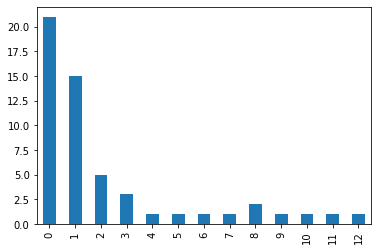

In [41]:
import matplotlib.pyplot as plt
neighborhoods['Bus Stops'].plot(kind = 'bar', x = "Neighborhoods", y = "Bus Stops")

So, with this graph we know that Downtown is the best neighborhood to live in if you're basing your transporting on the busses! 

Note: This is not a measure of how realiable they are. Don't trust a Port Authority bus to come on time.